<a href="https://colab.research.google.com/github/ShinyQ/Tugas-Besar-Statistika_Credit-Card-Exploration_Data-Mining/blob/main/Tubes_Statistika.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tugas Besar Statistika**

**Anggota Kelompok :**
1. Hanvito Michael Lee      - 1301190090
2. Kurniadi Ahmad Wijaya    - 1301194024
3. Moh Naufal Mizan Saputro - 1301190015
4. Naufal Haritsah Luthfi   - 1301194073

>
>

**Library Yang Digunakan :**

1. Pandas, Sebagai Alat Bantu Statistik Dalam Pengolahan Data
2. Numpy, Sebagai Manipulator Array Pada Data
3. Seaborn, Sebagai Visualisasi Data Yang Telah Di Modelkan 
4. Matplotlib, Sebagai Library Tambahan Dalam Visualisasi Data 
4. Scikit, Sebagai Pengetesan Akurasi Data Yang Telah Di Modelkan

>
>

**Deskripsi Data :**

Data yang digunakan bersumber pada [https://www.kaggle.com/sakshigoyal7/credit-card-customers](https://www.kaggle.com/sakshigoyal7/credit-card-customers) dimana tujuan data adalah untuk memprediksikan bagaimana sesorang kemungkinan akan meninggalkan penggunaan kartu kredit (churn) pada perusahaan.



### **Define Research Question**

Pada bagian ini kami mengelompokkan pertanyaan-pertanyaan yang akan kami jawab untuk diberikan ke manajer kartu kredit.

1. Apakah Terdapat Korelasi Antara Umur Dengan Jumlah Transaksi Yang Dilakukan Pengguna ?

2. Bagaimana Limit Kredit Yang Dimiliki Masing-Masing Jenis Kategori Kartu ?

3. Bagaimanakah Tingkat Edukasi Mempengaruhi Jenis Kartu Serta Pelanggan Yang Berhenti Berlangganan Kredit ?

4. Bagaimanakah tingkat transaksi yang dikeluarkan pengguna berdasarkan kategori kartu ?

5. Bagaimanakah Kategori Pemasukan Pengguna Mempengaruhi Jenis Kartu ?

6. Bagaimanakah Korelasi Antara Jumlah Transaksi Dan Jumlah Kredit Yang Dikeluarkan ?

7. Apakah Umur Mempengaruhi Jumlah Transaksi Kredit ?

8. Bagaimanakah Jenis Kartu Kredit Mempengaruhi Jumlah Transaksi Pengguna ?

9. Bagaimanakah Korelasi Umur Dengan Jumlah Pengeluaran Kredit ?

10. Bagaimanakah Pengaruh Total Pengeluaran Terhadap Total Transaksi Pengguna ?

**TODO**

1. Modelling Data Deskriptif Ke Kuantitatif

### **Collect And Organize Data**

In [ ]:
# Mengimport Library Yang Dibutuhkan
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import urllib.request

In [ ]:
# Memanggil File BankChurners.csv yang akan di processing 

def get_pdf():
    user_agent = 'Mozilla/5.0 (Windows; U; Windows NT 5.1; en-US; rv:1.9.0.7) Gecko/2009021910 Firefox/3.0.7'
    
    url = "https://cdn.discordapp.com/attachments/781504776495038524/789899865962053632/BankChurners.csv"
    headers={'User-Agent':user_agent,} 
    
    request=urllib.request.Request(url,None,headers) #The assembled request
    response = urllib.request.urlopen(request)
    return response

# Membaca File CSV yang telah diimport
data_csv = get_pdf()
data = pd.read_csv(data_csv)

In [ ]:
# Menampilkan Sampel data teratas
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [ ]:
# Mengecek Ukuran Data 
data.shape

(10127, 23)

### **Wrangle Data**

In [ ]:
# Menghapus Kolom Yang Tidak Digunakan
data.drop([
           'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 
           'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2',
          ], 
          axis=1, inplace=True)

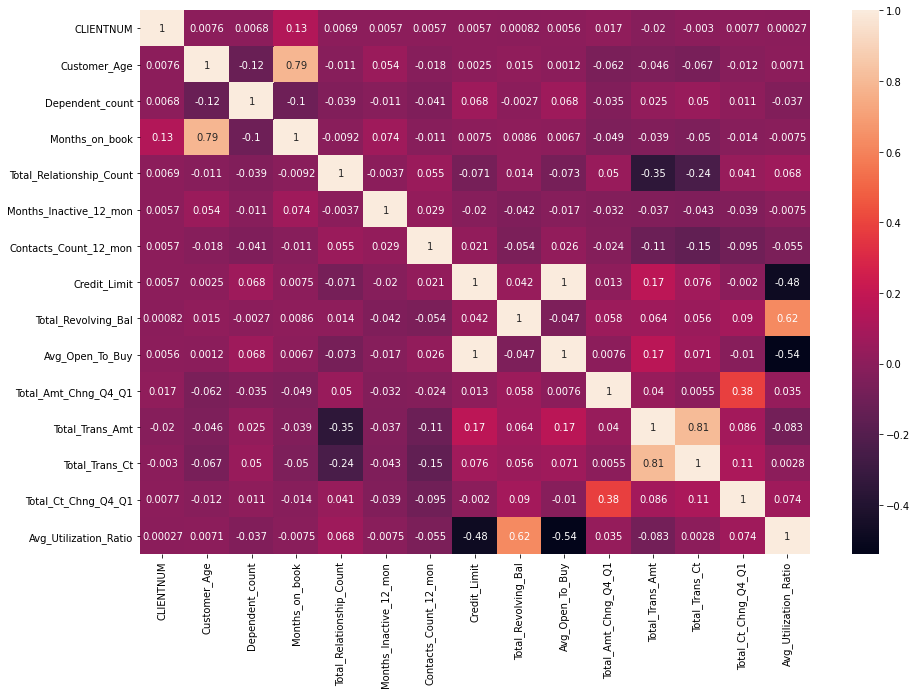

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(), annot=True, cmap='rocket')

In [ ]:
# Menghapus Kolom Yang Tidak Digunakan
data.drop([
           'Gender', 'Dependent_count', 'Marital_Status', 'Months_on_book', 
           'Total_Relationship_Count', 'Months_Inactive_12_mon', 'CLIENTNUM',
           'Contacts_Count_12_mon', 'Total_Revolving_Bal', 'Avg_Open_To_Buy',
           'Total_Amt_Chng_Q4_Q1', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'
          ], 
          axis=1, inplace=True)

In [ ]:
# Mengecek Apakah Terdapat Data Kosong Pada Data
data.isnull().sum()

Attrition_Flag     0
Customer_Age       0
Education_Level    0
Income_Category    0
Card_Category      0
Credit_Limit       0
Total_Trans_Amt    0
Total_Trans_Ct     0
dtype: int64

**Kesimpulan:** Tidak Terdapat Data Kosong Pada Keseluruhan Value di Kolom

In [ ]:
# Mengecek Jenis Data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Attrition_Flag   10127 non-null  object 
 1   Customer_Age     10127 non-null  int64  
 2   Education_Level  10127 non-null  object 
 3   Income_Category  10127 non-null  object 
 4   Card_Category    10127 non-null  object 
 5   Credit_Limit     10127 non-null  float64
 6   Total_Trans_Amt  10127 non-null  int64  
 7   Total_Trans_Ct   10127 non-null  int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 633.1+ KB


In [ ]:
# Mengecek Deskripsi Statistik Data
data.describe()

,Customer_Age,Credit_Limit,Total_Trans_Amt,Total_Trans_Ct
count,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,8631.953698,4404.086304,64.858695
std,8.016814,9088.776650,3397.129254,23.472570
min,26.000000,1438.300000,510.000000,10.000000
25%,41.000000,2555.000000,2155.500000,45.000000
50%,46.000000,4549.000000,3899.000000,67.000000
75%,52.000000,11067.500000,4741.000000,81.000000
max,73.000000,34516.000000,18484.000000,139.000000


### **Explore And Visualize Data**

### **Analyze And Interpret Data**